In [16]:
import json
import pandas as pd
import numpy as np
import _pickle as pickle

with open("data.json") as f:
        links = json.load(f)

In [17]:
df = pd.DataFrame(links)

In [18]:
df

,Name,About
0,Software Developer0,"I am an experienced Software Developer with over 10 years of experience in the field. I have a strong background in software engineering, design, and development. I have a deep understanding of software development processes and methodologies, and I am well-versed in a variety of programming languages and frameworks.I have a passion for creating innovative solutions to complex problems, and I am always looking for ways to improve the user experience. I am highly organized and detail-oriented..."
1,Software Developer1,"I am an experienced Software Developer with over 10 years of experience in the field. I have a strong background in developing software applications for a variety of platforms, including web, mobile, and desktop. I have a deep understanding of software development principles, including object-oriented programming, design patterns, and software architecture. I am also well-versed in a variety of programming languages, such as Java, C#, and JavaScript.I have a proven track record of delivering..."
2,Software Developer2,"I am an experienced Software Developer with over 10 years of experience in developing software solutions for a variety of industries. I have a deep understanding of software development principles and best practices, and I am comfortable working with a variety of programming languages, frameworks, and databases. I have a proven track record of delivering high-quality software solutions on time and on budget. I am an excellent problem solver and I am passionate about creating robust, reliable..."
3,Software Developer3,"I am an experienced software developer with over 10 years of experience in the field. I have a strong background in developing software solutions for a variety of industries, including finance, healthcare, and retail. I have a proven track record of success in developing software solutions that meet customer requirements and exceed expectations.I have a deep understanding of software development principles, including object-oriented programming, design patterns, and software architecture. I ..."
4,Software Developer4,"I am a highly experienced Software Developer with over 10 years of experience in the field. I am skilled in a variety of programming languages, including Java, C++, and Python. I have extensive experience developing both web and mobile applications, and I am comfortable working with a variety of frameworks and APIs. I have a deep understanding of software development best practices, such as software design patterns, test-driven development, and continuous integration. My experience also incl..."
...,...,...
1425,EMT5,"I am an experienced working professional in the Emergency Medical Technician field. With over 10 years of experience dedicated to providing emergency medical care for patients, I have an in-depth knowledge of the protocols and techniques necessary to provide a safe and effective response to emergency situations. My ability to manage multiple tasks and prioritize patient care in various emergency situations has allowed me to successfully handle a wide variety of medical emergencies. In additi..."
1426,EMT6,I am an experienced working professional in the Emergency Medical Technician (EMT) field. I have been working in this field for over five years and have gained a wealth of knowledge and experience. I am certified in both basic and advanced life support and have a strong understanding of the medical protocols and procedures that are necessary to provide quality care to patients. I am also knowledgeable in the use of medical equipment and have a strong understanding of the medical terminology ...
1427,EMT7,"I am an experienced working professional in the Emergency Medical Technician (EMT) field. I have been working in this field for the past five years and have developed a strong knowledge base of the medical field. My experience has included working in both urban and rural settings, as well as in both hospital and non-hospi

In [19]:
qs = ['Industry',
      'Field',
      'Experience',
      'Position',
      'Company',
      'Skill',
      'Service']

# Creating a DF of the questions/categories
features_df = pd.DataFrame(columns=qs)

# Filling in Data
for i in features_df.columns:
    
    # Range of numbers to represent different labels in each category
    if i=="Industry":
        features_df[i] = np.random.randint(0,10, df.shape[0])
    if i == 'Field':
        features_df[i] = np.random.randint(0,10, df.shape[0])
    if i == 'Experience':
        features_df[i] = np.random.randint(1,20, df.shape[0])
    if i == 'Position':
        features_df[i] = np.random.randint(0,3, df.shape[0])
    if i =='Company':
        features_df[i] = np.random.randint(0,100, df.shape[0])
    if i == 'Skill':
        features_df[i] = np.random.randint(1,30, df.shape[0])
    if i =='Service':
        features_df[i] = np.random.randint(0,3, df.shape[0])
    # Logic: The numbers represent a specific choice within the categories
    # So your number 1 preferred artist/song/album under the Music, your one favorite movie, etc.
    
# Joining the two dataframes
final_df = df.join(features_df)
final_df


,Name,About,Industry,Field,Experience,Position,Company,Skill,Service
0,Software Developer0,"I am an experienced Software Developer with over 10 years of experience in the field. I have a strong background in software engineering, design, and development. I have a deep understanding of software development processes and methodologies, and I am well-versed in a variety of programming languages and frameworks.I have a passion for creating innovative solutions to complex problems, and I am always looking for ways to improve the user experience. I am highly organized and detail-oriented...",6,7,2,2,73,20,0
1,Software Developer1,"I am an experienced Software Developer with over 10 years of experience in the field. I have a strong background in developing software applications for a variety of platforms, including web, mobile, and desktop. I have a deep understanding of software development principles, including object-oriented programming, design patterns, and software architecture. I am also well-versed in a variety of programming languages, such as Java, C#, and JavaScript.I have a proven track record of delivering...",6,8,12,2,2,4,0
2,Software Developer2,"I am an experienced Software Developer with over 10 years of experience in developing software solutions for a variety of industries. I have a deep understanding of software development principles and best practices, and I am comfortable working with a variety of programming languages, frameworks, and databases. I have a proven track record of delivering high-quality software solutions on time and on budget. I am an excellent problem solver and I am passionate about creating robust, reliable...",9,2,6,1,94,27,2
3,Software Developer3,"I am an experienced software developer with over 10 years of experience in the field. I have a strong background in developing software solutions for a variety of industries, including finance, healthcare, and retail. I have a proven track record of success in developing software solutions that meet customer requirements and exceed expectations.I have a deep understanding of software development principles, including object-oriented programming, design patterns, and software architecture. I ...",6,5,8,1,12,11,2
4,Software Developer4,"I am a highly experienced Software Developer with over 10 years of experience in the field. I am skilled in a variety of programming languages, including Java, C++, and Python. I have extensive experience developing both web and mobile applications, and I am comfortable working with a variety of frameworks and APIs. I have a deep understanding of software development best practices, such as software design patterns, test-driven development, and continuous integration. My experience also incl...",8,0,16,1,33,4,0
...,...,...,...,...,...,...,...,...,...
1425,EMT5,"I am an experienced working professional in the Emergency Medical Technician field. With over 10 years of experience dedicated to providing emergency medical care for patients, I have an in-depth knowledge of the protocols and techniques necessary to provide a safe and effective response to emergency situations. My ability to manage multiple tasks and prioritize patient care in various emergency situations has allowed me to successfully handle a wide variety of medical emergencies. In additi...",3,8,9,1,28,19,2
1426,EMT6,I am an experienced working professional in the Emergency Medical Technician (EMT) field. I have been working in this field for over five years and have gained a wealth of knowledge and experience. I am certified in both basic and advanced life support and have a strong understanding of the medical protocols and procedures that are necessary to provide quality care to patients. I am also knowledgeable in the use of medical equipment and have a strong understanding of the medical terminology ...,3,0,10,2,53,28,1
1427,EMT7,"I am an experienced working professional in the Emergency Medical Technician (EMT) field. I have been working in this field fo

In [20]:
# Exporting the complete DF
with open("profiles.pkl", "wb") as fp:
    pickle.dump(final_df, fp)

In [21]:
# Importing the libraries
import pandas as pd
pd.set_option('display.max_colwidth', 500)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import _pickle as pickle
from nltk.stem import WordNetLemmatizer
from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder

# Loading the data
with open("profiles.pkl",'rb') as fp:
    df = pickle.load(fp)

In [22]:
# Instantiating the lemmatizer
lemmatizer = WordNetLemmatizer()

# Tokenizing Function
def tokenize(text):
    """
    Tokenizing the bios, then lemmatizing them
    """
    # Creating a library of stopwords
    stops = stopwords.words('english')
    
    # Lowercasing the words
    text = text.lower()
    
    # Removing the punctuations (periods)
    text = text.replace('.', '')
    
    # Splitting on spaces between words
    text = text.split(' ')
    
    # Lemmatizing the words and removing stop words
    text = [lemmatizer.lemmatize(i) for i in text if i not in stops]
    
    return text
    
# Applying the function to each user bio
df['About'] = df.About.apply(tokenize)

Number of unique words:  6654


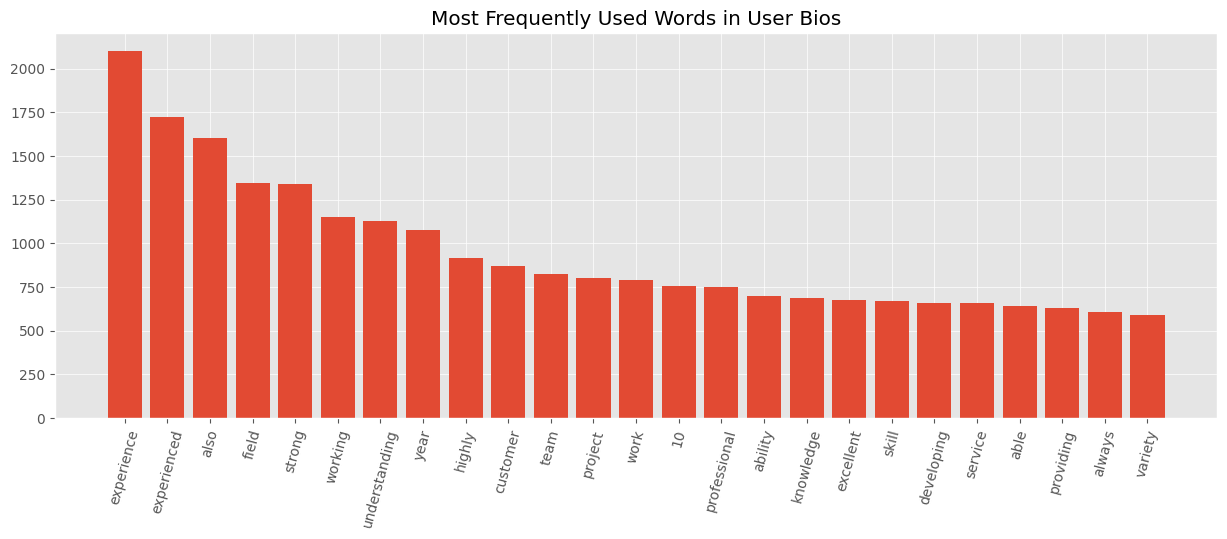

In [23]:
# Creating a set list that will only take in unique words
total_vocab = set()

# Iterating through the bios for each word
for bio in df['About']:
    total_vocab.update(bio)

# Printing out the number of unique words in all the bios combined
print("Number of unique words: ",len(total_vocab))

# Determining the most frequent words in user bios
words = []

# Adding all the words in each bio to a list
for bio in df['About']:
    words.extend(bio)

# Determining the use frequency of each word in all the bios
bio_freq = FreqDist(words)
bio_freq.most_common(104)

# Plotting the most frequently used words
plt.style.use('ggplot')
plt.figure(figsize=(15,5))

plt.bar(*zip(*bio_freq.most_common(25)))
plt.xticks(rotation=75)
plt.title('Most Frequently Used Words in User Bios')
plt.show()

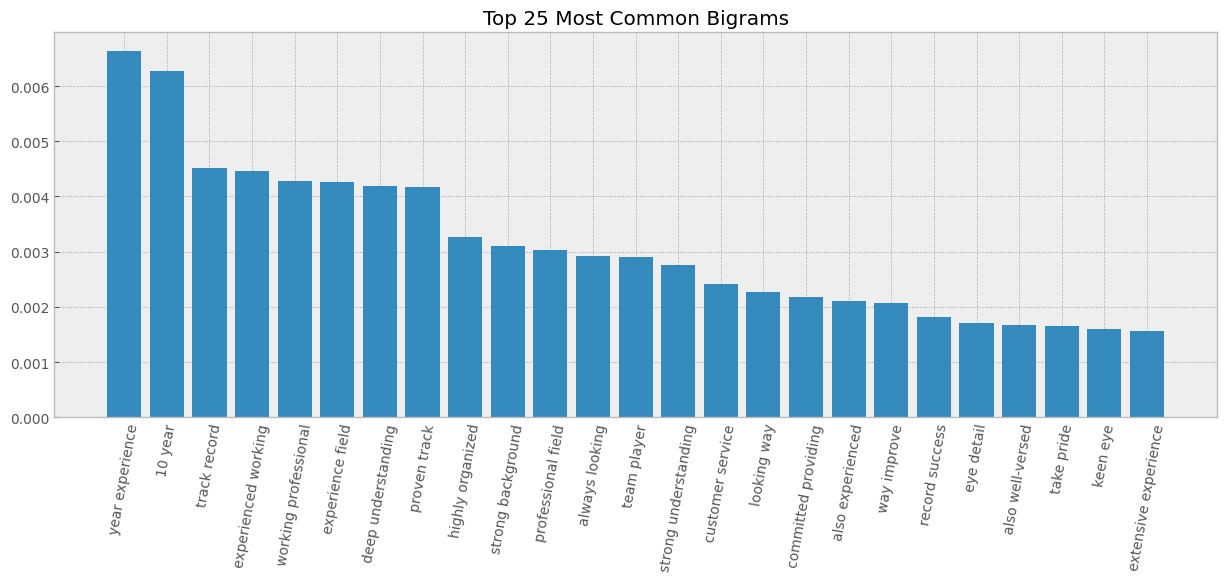

In [24]:
# Instantiating the score of each bigram
bigram_meas = BigramAssocMeasures()

# Finding and ranking the Bigrams in each bio
bio_finder = BigramCollocationFinder.from_words(words)

# Finding the frequency scores of each bigram 
bio_scored = bio_finder.score_ngrams(bigram_meas.raw_freq)

# Top 50 most common bigrams
bio_scored[:50]

# Creating a list of the bigrams
bg = list(map(lambda x: x[0][0] + ' ' + x[0][1], bio_scored[:50]))

# Creating a list of the frequency scores
bio_scores = list(map(lambda x: x[1], bio_scored[:50]))

# Combining both the scores and the bigrams
bigrams = list(zip(bg, bio_scores))

# Plotting the bigrams and their frequency scores
plt.style.use('bmh')
plt.figure(figsize=(15,5))

plt.bar(*zip(*bigrams[:25]))
plt.xticks(rotation=80)
plt.title('Top 25 Most Common Bigrams')
plt.show()

In [25]:

# Libraries
import pandas as pd
pd.set_option('display.max_colwidth', 500)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import _pickle as pickle
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import MinMaxScaler

# Loading in the cleaned DF
with open("profiles.pkl",'rb') as fp:
    df = pickle.load(fp)

In [26]:
# Instantiating the Scaler
scaler = MinMaxScaler()
# Scaling the categories then replacing the old values
df = df[['About']].join(
              pd.DataFrame(
          scaler.fit_transform(
                               df.drop(columns=['Name','About'],axis=1)), 
                               columns=df.columns[2:], 
                               index=df.index))
df

,About,Industry,Field,Experience,Position,Company,Skill,Service
0,"I am an experienced Software Developer with over 10 years of experience in the field. I have a strong background in software engineering, design, and development. I have a deep understanding of software development processes and methodologies, and I am well-versed in a variety of programming languages and frameworks.I have a passion for creating innovative solutions to complex problems, and I am always looking for ways to improve the user experience. I am highly organized and detail-oriented...",0.666667,0.777778,0.055556,1.0,0.737374,0.678571,0.0
1,"I am an experienced Software Developer with over 10 years of experience in the field. I have a strong background in developing software applications for a variety of platforms, including web, mobile, and desktop. I have a deep understanding of software development principles, including object-oriented programming, design patterns, and software architecture. I am also well-versed in a variety of programming languages, such as Java, C#, and JavaScript.I have a proven track record of delivering...",0.666667,0.888889,0.611111,1.0,0.020202,0.107143,0.0
2,"I am an experienced Software Developer with over 10 years of experience in developing software solutions for a variety of industries. I have a deep understanding of software development principles and best practices, and I am comfortable working with a variety of programming languages, frameworks, and databases. I have a proven track record of delivering high-quality software solutions on time and on budget. I am an excellent problem solver and I am passionate about creating robust, reliable...",1.000000,0.222222,0.277778,0.5,0.949495,0.928571,1.0
3,"I am an experienced software developer with over 10 years of experience in the field. I have a strong background in developing software solutions for a variety of industries, including finance, healthcare, and retail. I have a proven track record of success in developing software solutions that meet customer requirements and exceed expectations.I have a deep understanding of software development principles, including object-oriented programming, design patterns, and software architecture. I ...",0.666667,0.555556,0.388889,0.5,0.121212,0.357143,1.0
4,"I am a highly experienced Software Developer with over 10 years of experience in the field. I am skilled in a variety of programming languages, including Java, C++, and Python. I have extensive experience developing both web and mobile applications, and I am comfortable working with a variety of frameworks and APIs. I have a deep understanding of software development best practices, such as software design patterns, test-driven development, and continuous integration. My experience also incl...",0.888889,0.000000,0.833333,0.5,0.333333,0.107143,0.0
...,...,...,...,...,...,...,...,...
1425,"I am an experienced working professional in the Emergency Medical Technician field. With over 10 years of experience dedicated to providing emergency medical care for patients, I have an in-depth knowledge of the protocols and techniques necessary to provide a safe and effective response to emergency situations. My ability to manage multiple tasks and prioritize patient care in various emergency situations has allowed me to successfully handle a wide variety of medical emergencies. In additi...",0.333333,0.888889,0.444444,0.5,0.282828,0.642857,1.0
1426,I am an experienced working professional in the Emergency Medical Technician (EMT) field. I have been working in this field for over five years and have gained a wealth of knowledge and experience. I am certified in both basic and advanced life support and have a strong understanding of the medical protocols and procedures that are necessary to provide quality care to patients. I am also knowledgeable in the use of medical equipment and have a strong understanding of the medical terminology ...,0.333333,0.000000,0.500000,1.0,0.535354,0.964286,0

In [27]:
# Instantiating the Vectorizer, experimenting with both
#vectorizer = CountVectorizer()
vectorizer = TfidfVectorizer()

# Fitting the vectorizer to the Bios
x = vectorizer.fit_transform(df['About'])

# Creating a new DF that contains the vectorized words
df_wrds = pd.DataFrame(x.toarray(), columns=vectorizer.get_feature_names_out())

# Concating the words DF with the original DF
new_df = pd.concat([df, df_wrds], axis=1)

# Dropping the Bios because it is no longer needed in place of vectorization
new_df.drop('About', axis=1, inplace=True)

In [28]:
new_df

,Industry,Field,Experience,Position,Company,Skill,Service,10,100,15,...,young,your,youtube,z1000,zephyr,zero,zoned,zoning,zoonotic,zoos
0,0.666667,0.777778,0.055556,1.0,0.737374,0.678571,0.0,0.046231,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.666667,0.888889,0.611111,1.0,0.020202,0.107143,0.0,0.044396,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.222222,0.277778,0.5,0.949495,0.928571,1.0,0.050056,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.666667,0.555556,0.388889,0.5,0.121212,0.357143,1.0,0.037380,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.888889,0.000000,0.833333,0.5,0.333333,0.107143,0.0,0.046211,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1425,0.333333,0.888889,0.444444,0.5,0.282828,0.642857,1.0,0.027477,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1426,0.333333,0.000000,0.500000,1.0,0.535354,0.964286,0.5,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1427,0.555556,0.111111,0.500000,0.5,0.757576,0.214286,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1428,1.000000,0.777778,0.555556,0.0,0.323232,0.500000,0.5,0.034156,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
# Importing the library
from sklearn.decomposition import PCA

# Instantiating PCA
pca = PCA()

# Fitting and Transforming the DF
df_pca = pca.fit_transform(new_df)

# Plotting to determine how many features should the dataset be reduced to
'''plt.style.use("bmh")
plt.figure(figsize=(14,4))
plt.plot(range(1,new_df.shape[1]+1), pca.explained_variance_ratio_.cumsum())
plt.show()

# Finding the exact number of features that explain at least 95% of the variance in the dataset
total_explained_variance = pca.explained_variance_ratio_.cumsum()
n_over_95 = len(total_explained_variance[total_explained_variance>=.95])
n_to_reach_95 = new_df.shape[1] - n_over_95

# Printing out the number of features needed to retain 95% variance
print(f"Number features: {n_to_reach_95}\nTotal Variance Explained: {total_explained_variance[n_to_reach_95]}")

# Reducing the dataset to the number of features determined before
pca = PCA(n_components=n_to_reach_95)

# Fitting and transforming the dataset to the stated number of features and creating a new DF
df_pca = pca.fit_transform(new_df)

# Seeing the variance ratio that still remains after the dataset has been reduced
print(pca.explained_variance_ratio_.cumsum()[-1])'''

'plt.style.use("bmh")\nplt.figure(figsize=(14,4))\nplt.plot(range(1,new_df.shape[1]+1), pca.explained_variance_ratio_.cumsum())\nplt.show()\n\n# Finding the exact number of features that explain at least 95% of the variance in the dataset\ntotal_explained_variance = pca.explained_variance_ratio_.cumsum()\nn_over_95 = len(total_explained_variance[total_explained_variance>=.95])\nn_to_reach_95 = new_df.shape[1] - n_over_95\n\n# Printing out the number of features needed to retain 95% variance\nprint(f"Number features: {n_to_reach_95}\nTotal Variance Explained: {total_explained_variance[n_to_reach_95]}")\n\n# Reducing the dataset to the number of features determined before\npca = PCA(n_components=n_to_reach_95)\n\n# Fitting and transforming the dataset to the stated number of features and creating a new DF\ndf_pca = pca.fit_transform(new_df)\n\n# Seeing the variance ratio that still remains after the dataset has been reduced\nprint(pca.explained_variance_ratio_.cumsum()[-1])'

In [30]:
# Setting the amount of clusters to test out
cluster_cnt = [i for i in range(2, 20, 1)]

# Establishing empty lists to store the scores for the evaluation metrics
s_scores = []

db_scores = []

# Looping through different iterations for the number of clusters
for i in cluster_cnt:
    
    # Hierarchical Agglomerative Clustering with different number of clusters
    hac = AgglomerativeClustering(n_clusters=i)
    
    hac.fit(df_pca)
    
    cluster_assignments = hac.labels_
    
    ## KMeans Clustering with different number of clusters
    '''k_means = KMeans(n_clusters=i)
    
    k_means.fit(df_pca)
    
    cluster_assignments = k_means.predict(df_pca)'''
    
    # Appending the scores to the empty lists    
    s_scores.append(silhouette_score(df_pca, cluster_assignments))
    
    db_scores.append(davies_bouldin_score(df_pca, cluster_assignments))

Max Value:
Cluster #    Cluster Score
2       0.055886

Min Value:
Cluster #     Cluster Score
17       0.011508


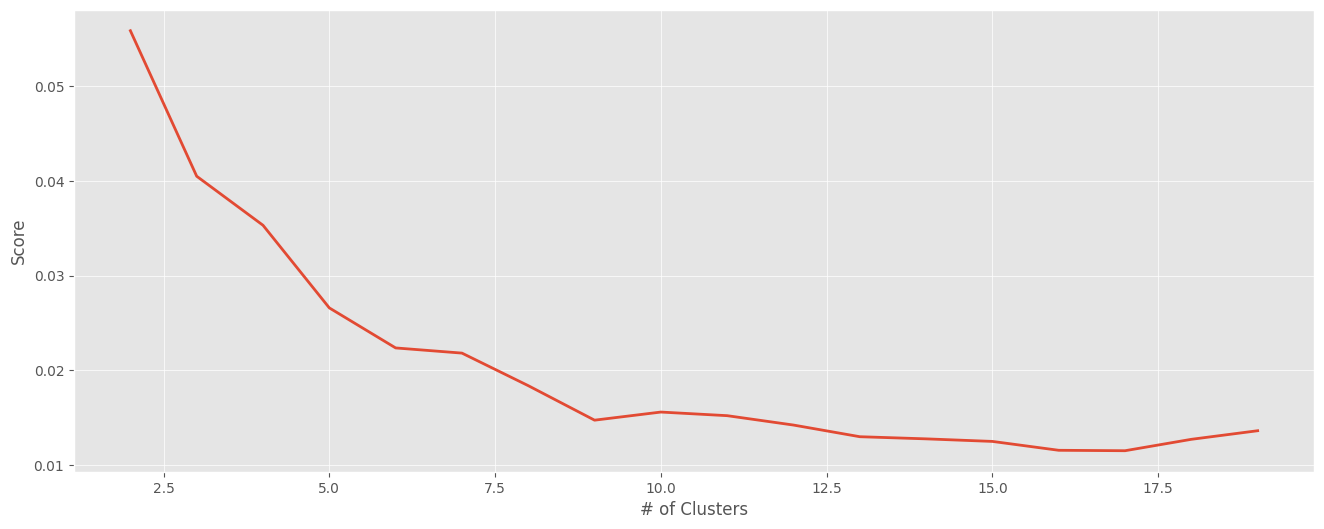

Max Value:
Cluster #    Cluster Score
9       4.256672

Min Value:
Cluster #     Cluster Score
18       3.602038


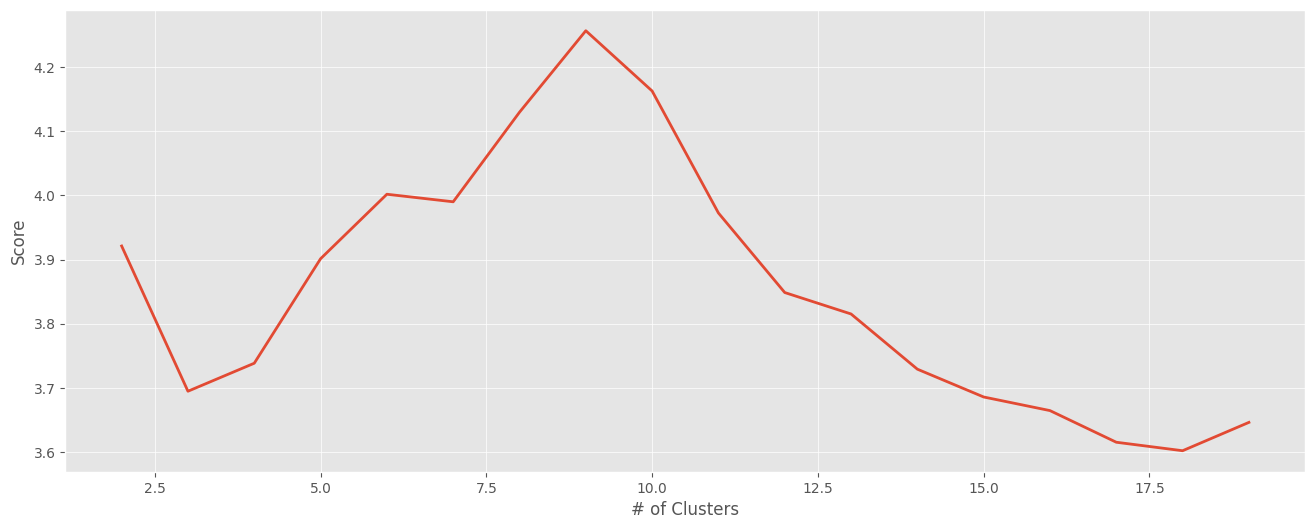

In [31]:
def plot_evaluation(y, x=cluster_cnt):
    """
    Plots the scores of a set evaluation metric. Prints out the max and min values of the evaluation scores.
    """
    
    # Creating a DataFrame for returning the max and min scores for each cluster
    df = pd.DataFrame(columns=['Cluster Score'], index=[i for i in range(2, len(y)+2)])
    df['Cluster Score'] = y
    
    print('Max Value:\nCluster #', df[df['Cluster Score']==df['Cluster Score'].max()])
    print('\nMin Value:\nCluster #', df[df['Cluster Score']==df['Cluster Score'].min()])
    
    # Plotting out the scores based on cluster count
    plt.figure(figsize=(16,6))
    plt.style.use('ggplot')
    plt.plot(x,y)
    plt.xlabel('# of Clusters')
    plt.ylabel('Score')
    plt.show()
    
# Running the function on the list of scores
plot_evaluation(s_scores)

plot_evaluation(db_scores)

In [32]:
# Instantiating HAC
hac = AgglomerativeClustering(n_clusters=8)

# Fitting
hac.fit(df_pca)

# Getting cluster assignments
cluster_assignments = hac.labels_

# Unscaling the categories then replacing the scaled values
df = df[['About']].join(pd.DataFrame(scaler.inverse_transform(df.drop('About', axis=1)), columns=df.columns[1:], index=df.index))

# Assigning the clusters to each profile
df['Cluster #'] = cluster_assignments

# Viewing the dating profiles with cluster assignments
df

,About,Industry,Field,Experience,Position,Company,Skill,Service,Cluster #
0,"I am an experienced Software Developer with over 10 years of experience in the field. I have a strong background in software engineering, design, and development. I have a deep understanding of software development processes and methodologies, and I am well-versed in a variety of programming languages and frameworks.I have a passion for creating innovative solutions to complex problems, and I am always looking for ways to improve the user experience. I am highly organized and detail-oriented...",6.0,7.0,2.0,2.0,73.0,20.0,0.0,3
1,"I am an experienced Software Developer with over 10 years of experience in the field. I have a strong background in developing software applications for a variety of platforms, including web, mobile, and desktop. I have a deep understanding of software development principles, including object-oriented programming, design patterns, and software architecture. I am also well-versed in a variety of programming languages, such as Java, C#, and JavaScript.I have a proven track record of delivering...",6.0,8.0,12.0,2.0,2.0,4.0,0.0,3
2,"I am an experienced Software Developer with over 10 years of experience in developing software solutions for a variety of industries. I have a deep understanding of software development principles and best practices, and I am comfortable working with a variety of programming languages, frameworks, and databases. I have a proven track record of delivering high-quality software solutions on time and on budget. I am an excellent problem solver and I am passionate about creating robust, reliable...",9.0,2.0,6.0,1.0,94.0,27.0,2.0,6
3,"I am an experienced software developer with over 10 years of experience in the field. I have a strong background in developing software solutions for a variety of industries, including finance, healthcare, and retail. I have a proven track record of success in developing software solutions that meet customer requirements and exceed expectations.I have a deep understanding of software development principles, including object-oriented programming, design patterns, and software architecture. I ...",6.0,5.0,8.0,1.0,12.0,11.0,2.0,1
4,"I am a highly experienced Software Developer with over 10 years of experience in the field. I am skilled in a variety of programming languages, including Java, C++, and Python. I have extensive experience developing both web and mobile applications, and I am comfortable working with a variety of frameworks and APIs. I have a deep understanding of software development best practices, such as software design patterns, test-driven development, and continuous integration. My experience also incl...",8.0,0.0,16.0,1.0,33.0,4.0,0.0,2
...,...,...,...,...,...,...,...,...,...
1425,"I am an experienced working professional in the Emergency Medical Technician field. With over 10 years of experience dedicated to providing emergency medical care for patients, I have an in-depth knowledge of the protocols and techniques necessary to provide a safe and effective response to emergency situations. My ability to manage multiple tasks and prioritize patient care in various emergency situations has allowed me to successfully handle a wide variety of medical emergencies. In additi...",3.0,8.0,9.0,1.0,28.0,19.0,2.0,1
1426,I am an experienced working professional in the Emergency Medical Technician (EMT) field. I have been working in this field for over five years and have gained a wealth of knowledge and experience. I am certified in both basic and advanced life support and have a strong understanding of the medical protocols and procedures that are necessary to provide quality care to patients. I am also knowledgeable in the use of medical equipment and have a strong understanding of the medical terminology ...,3.0,0.0,10.0,2.0,53.0,28.0,1.0,5
1427,"I am an experienced working professional in the Emergency Medical Technician (EMT) field. I have been working in this field 

In [36]:
import random

# Randomly choosing a cluster
rand_cluster = random.choice(df['Cluster #'].unique())

# Assigning the Cluster Profiles as a new DF
group = df[df['Cluster #']==rand_cluster].drop('Cluster #', axis=1)


## Vectorizing the Bios in the Selected Cluster

# Fitting the vectorizer to the Bios
cluster_x = vectorizer.fit_transform(group['About'])

# Creating a new DF that contains the vectorized words
cluster_v = pd.DataFrame(cluster_x.toarray(), index=group.index, columns=vectorizer.get_feature_names_out())

# Joining the vector DF and the original DF
group = group.join(cluster_v)

# Dropping the Bios because it is no longer needed in place of vectorization
group.drop('About', axis=1, inplace=True)


## Finding Correlations among the users

# Trasnposing the DF so that we are correlating with the index(users)
corr_group = group.T.corr()


## Finding the Top 10 Similar Users

# Randomly selecting a user
random_user = random.choice(corr_group.index)

print("Top 10 most similar users to User #", random_user, '\n')

# Creating a DF with the top 10 most similar users to the selected user
top_10_sim = corr_group[[random_user]].sort_values(by=[random_user],axis=0, ascending=False)[1:11]

# Printing out the results
print(top_10_sim)

print("\nThe most similar user to User #", random_user, "is User #", top_10_sim.index[0])

Top 10 most similar users to User # 933 

           933
1165  0.998133
836   0.997178
989   0.996985
732   0.996698
171   0.996449
1010  0.995536
737   0.995323
1288  0.995028
172   0.994968
1020  0.994876

The most similar user to User # 933 is User # 1165


In [37]:
df.loc[top_10_sim.index]

,About,Industry,Field,Experience,Position,Company,Skill,Service,Cluster #
1165,"I am an experienced working professional in the field of Property Management. I have been in this field for over 10 years and have extensive knowledge of the industry. I am well-versed in all aspects of property management, from tenant relations to financial management. I have a deep understanding of the legal and regulatory requirements of the industry, and I am able to provide sound advice to clients. I am also highly organized and have a great eye for detail. I am able to efficiently mana...",0.0,8.0,9.0,0.0,53.0,20.0,0.0,0
836,"I am an experienced Geologist with more than 10 years of experience in the field. I have worked on a variety of projects ranging from mineral exploration to environmental studies. I have extensive knowledge of geological processes, including sedimentary, igneous, and metamorphic rocks, as well as their associated structures and properties. I am highly proficient in the use of geological mapping software, such as ArcGIS and Surfer, and I am well-versed in the interpretation of geological data...",3.0,9.0,12.0,0.0,49.0,21.0,0.0,0
989,"I am an experienced Nurse Practitioner with over 10 years of experience in the field. I have a Master's degree in Nursing and am board certified in my specialty. I have experience in providing direct patient care, managing patient care plans, and providing education to patients and families. I am knowledgeable in the latest evidence-based practices and have a strong commitment to providing quality care. I am passionate about helping my patients achieve their health goals and strive to provid...",2.0,7.0,10.0,0.0,49.0,17.0,1.0,0
732,"I am an experienced Mobile Application Developer with over 5 years of experience in developing mobile applications for both Android and iOS platforms. I have a strong understanding of the mobile application development process, from concept to completion. I have a proven track record of developing successful mobile applications that have been used by millions of users.I have a deep knowledge of the mobile application development process, including design, coding, testing, and deployment. I a...",5.0,7.0,10.0,0.0,65.0,25.0,0.0,0
171,"I am an experienced working professional in the field of Supply Chain Analysis. With over 4 years of experience in the field, I have a deep understanding of supply chain management in all stages, from strategic planning to operational execution. I have a proven track record of improving operational efficiency, reducing cost, and increasing customer satisfaction. I am skilled in developing and managing relationships with vendors, forecasting customer demand, and creating cost-effective soluti...",5.0,6.0,16.0,0.0,66.0,28.0,1.0,0
1010,"I am an experienced working professional in the Dentist field with over 10 years of practice. I am highly skilled in general and cosmetic dentistry, with experience in root canals, crowns, bridges, composite fillings, extractions, dental implants and whitening procedures. I stay up to date with the latest advancements in dental technology to ensure the best possible service for my patients. I focus on patient education and prevention to ensure my patients understand the importance of good or...",0.0,4.0,7.0,1.0,51.0,24.0,0.0,0
737,"As an experienced Mobile Application Developer, I have extensive knowledge and experience in developing, testing, and deploying mobile applications for various platforms. I have strong technical skills and a solid understanding of industry standard tools and technologies. I strive to use the best practices to create and maintain quality applications with a focus on usability and performance.I have experience in creating apps for multiple platforms, including iOS, Android, Windows, and more. ...",0.0,3.0,10.0,1.0,59.0,23.0,1.0,0
1288,"I am an experienced Marine Mechanic with over 10 years of experience in the field. I have extensive knowledge and experience in the repair and main

In [38]:
df.loc[random_user]

About         I am an experienced working professional in the field of Political Science. With a strong academic background in the field, I have a keen understanding of the various political systems and theories of government. I specialize in the study of political behavior, public opinion, and policy analysis. My research interests include the role of social media in political campaigns and the impact of technology on the political process. I have experience in conducting quantitative and qualitative res...
Industry                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              